# Logistic Regression
Given an input $x$ we want to find a predict $\hat{y} = \mathbb{P}(y = 1 | x)$ with $x \in \mathbb{R}^{n_x}$.
To get a prediction between 0 and 1, the output will be the result of a sigmoid function:
$$\hat{y} = \sigma(w^Tx + b)$$
with:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

## Cost Function
To measure the performance of our regression we have to define a **loss function** that tell us how good our predicitions are. In logistic regression we define the following loss function:
$$\mathcal{L}(\hat{y}, y) = - (y\log\hat{y} + (1-y)\log(1-\hat{y}))$$
It makes sense recaling that both $y$ and $\hat{y}$ are numbers between 0 and 1.

The cost function is the loss function applied to the whole dataset:
$$\mathcal{J}(w,b) = \frac{1}{m} \sum_{i=1}^m\mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = - \frac{1}{m} \sum_{i=1}^m \big[y^{(i)}\log\hat{y^{(i)}} + (1-y^{(i)})\log(1-\hat{y^{(i)}})\big]$$

## Gradient Descent
When training a model we want to find $w$ and $b$ such that $\mathcal{J}(w,b)$ has the lowest value possible. It is possible because cost function is a **convex function**.

In logistic regression we start with $w = b = 0$ and then change values based on the value of the learning rate:
$$w:= w - \alpha \frac{\partial\mathcal{J}(w,b)}{\partial w} \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: b:= b - \alpha \frac{\partial\mathcal{J}(w,b)}{\partial b}$$

### Chain rule
We need to use the chain rule in order to find the derivative of the cost function:
$$\frac{\partial \mathcal{L}(a,y)}{\partial a} = - \frac{y}{a} + \frac{1-y}{1-a}$$
$$\frac{\partial\mathcal{L}}{\partial z} = \frac{\partial\mathcal{L}}{\partial a}\frac{\partial a}{\partial z} =\: ...\: = a - y $$

Now we compute how much we change the weights:
$$dw_1 = \frac{\partial\mathcal{L}}{\partial w_1} = x_1 \frac{\partial\mathcal{L}}{\partial z}$$
$$dw_2 = \frac{\partial\mathcal{L}}{\partial w_2} = x_2 \frac{\partial\mathcal{L}}{\partial z}$$
$$db = \frac{\partial\mathcal{L}}{\partial z}$$

# Logistic Regression implementation
In this notebook I will implement a Logistic Regressor model in order to perform a binary classification on a simple **Kaggle** dataset, the Iris datasets, in order to classify whether a flower is:
- Iris setosa: `y = (iris.target == 0).astype(int)`
- Iris Versicolor: `y = (iris.target == 1).astype(int)`
- Iris Virginica: `y = (iris.target == 2).astype(int)`

## 1 - Importing Libraries
At first we need to import the required libraries:
- `numpy`: to work with arrays and dot products
- `copy`: useful in the optimize function
- `matplotlib`: to see data plots
- `sklearn.datasets`: to train our model and calculate metrics
- `sklearn.model_selection.train_test_split`: to split data in training and test

In [ ]:
# Libraries import
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Loading Data
We import a dataset provided by sklearn and we divide data in test and train in order to perform training and then evaluate the model by testing its performance on new data.

In this case I am using a single train-test split. With cross validation we can probably get better results.

In [55]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 2).astype(int) # Change this line for different iris species classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

X_train = X_train.T
X_test = X_test.T

## 3 - Logistic Regressor Class Implementation
I implemented the model as a Python class. It contains the following methods:
- `__init__`: executed when the model is initialized. It will initilize data related to the model, such us weights ($w$), learning rate ($α$) and others.
- `sigmoid`: the activation function, defined as follows:
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$
- `propagate`: it calculates $dw$ and $db$ in order to update $w$ and $b$ during the iterations
- `optimize`: it updates the values of $w$ and $b$ as follows:
  $$w := w - α \cdot dw \:\:\:\:\:\:\:\:\:\: b := b - α \cdot db$$
- `predict`: to test model with new data and calculate its performance

In [ ]:
# Logistic Regressor class
class LogisticRegressor():
  def __init__(self, dim, num_iterations=100, learning_rate=0.009, print_cost=False):
    self.params = {"w": np.zeros((dim, 1)),
                   "b": 0.0}
    self.grads = {"dw": 0.0,
                  "db": 0.0}
    self.num_iterations = num_iterations
    self.learning_rate = learning_rate
    self.print_cost = print_cost

  def sigmoid(self, z):
    s = 1 / (1 + np.exp(-z))
    return s

  def propagate(self, X, Y):
    m = X.shape[1]
    A = self.sigmoid(np.dot(self.params["w"].T, X) + self.params["b"])
    self.cost = - (1/m) * np.sum((Y*np.log(A)) + (1- Y)*np.log(1 - A))
    self.grads["dw"] = (1/m) * np.dot(X, (A - Y).T)
    self.grads["db"] = (1/m) * np.sum(A - Y)
    self.cost = np.squeeze(np.array(self.cost))

  def optimize(self, X, Y):
    w = copy.deepcopy(self.params["w"])
    b = copy.deepcopy(self.params["b"])

    costs = []

    for i in range(self.num_iterations):
      self.propagate(X, Y)

      self.params["w"] -= self.learning_rate*self.grads["dw"]
      self.params["b"] -= self.learning_rate*self.grads["db"]

      if i % 100 == 0:
        costs.append(self.cost)

        if self.print_cost:
          print ("Cost after iteration %i: %f" %(i, self.cost))

    return costs

  def predict(self, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    self.params["w"] = self.params["w"].reshape(X.shape[0], 1)
    A = self.sigmoid(np.dot(self.params["w"].T, X) + self.params["b"])

    Y_prediction = (A > 0.5).astype(int)

    return Y_prediction

  def score(self, X, y):
    y_pred = self.predict(X)
    return np.mean(y_pred == y)

## 4 - Initialization, Training and Predictions
In the following section we define the model, calculate the cost function through iterations and calculate the accuracy.

In [56]:
# Initialize model
model = LogisticRegressor(dim=X_train.shape[0], num_iterations=1000, learning_rate=0.01, print_cost=True)

# Train model
costs = model.optimize(X_train, y_train)

# Model accuracy evaluation
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.505486
Cost after iteration 200: 0.432243
Cost after iteration 300: 0.390960
Cost after iteration 400: 0.363626
Cost after iteration 500: 0.343557
Cost after iteration 600: 0.327784
Cost after iteration 700: 0.314800
Cost after iteration 800: 0.303753
Cost after iteration 900: 0.294127
Test Accuracy: 96.67%


## 5 - Data Plot
We finally plot the results.

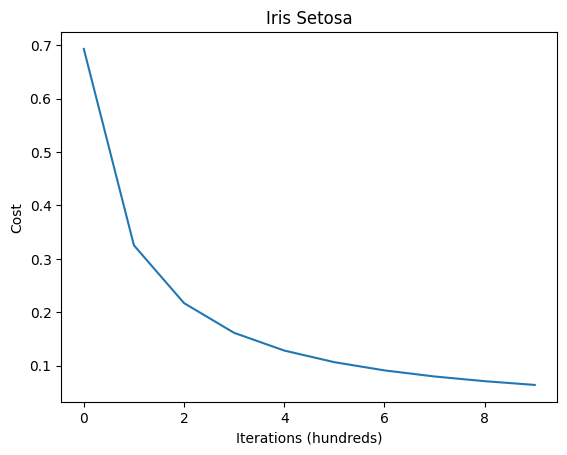

Test Accuracy for Iris Setosa: 100.00%


In [ ]:
# plot cost function
plt.plot(costs)
plt.title("Iris Setosa")
plt.xlabel("Iterations (hundreds)")
plt.ylabel("Cost")
plt.show()
print(f"Test Accuracy for Iris Setosa: {accuracy * 100:.2f}%")

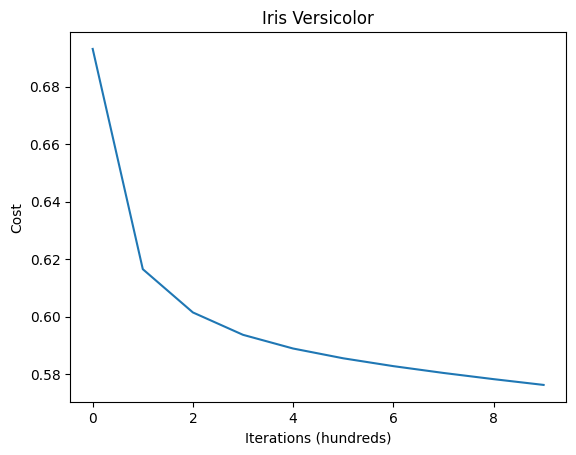

Test Accuracy for Iris Versicolor: 63.33%


In [ ]:
plt.plot(costs)
plt.title("Iris Versicolor")
plt.xlabel("Iterations (hundreds)")
plt.ylabel("Cost")
plt.show()
print(f"Test Accuracy for Iris Versicolor: {accuracy * 100:.2f}%")

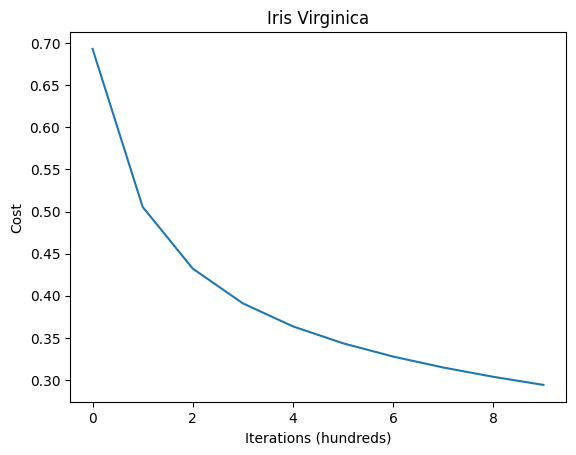

Test Accuracy for Iris Virginica: 96.67%


In [ ]:
plt.plot(costs)
plt.title("Iris Virginica")
plt.xlabel("Iterations (hundreds)")
plt.ylabel("Cost")
plt.show()
print(f"Test Accuracy for Iris Virginica: {accuracy * 100:.2f}%")